In [1]:
import os
import sys

import warnings 
warnings.filterwarnings('ignore')

# fichier utils.py 
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('utils.py'))))
import utils

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import pickle 
import random
import string
import json

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = utils.load_data()  # nettoyage du dataset

## Un peu d'exploration de l'anamyse des données

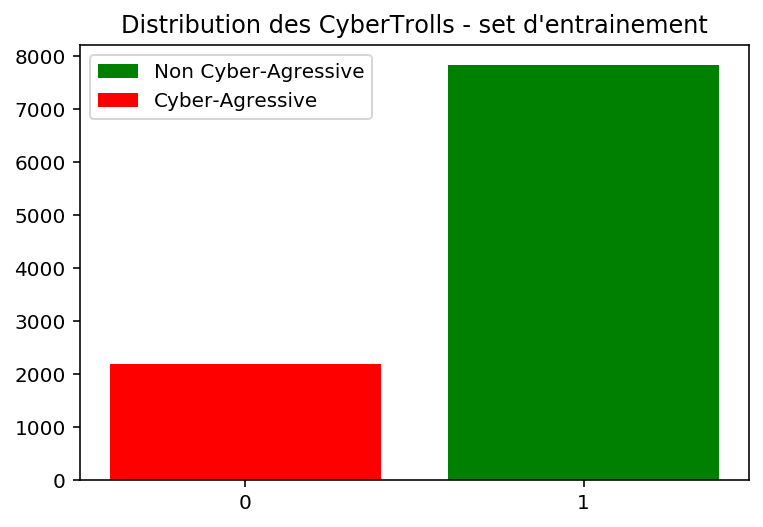

In [3]:
# distribution des cyber trolls vs non-cyber trolls
counter = Counter(df.label)
plt.title('Distribution des CyberTrolls - set d\'entrainement')
plt.bar(list(counter.keys())[0], list(counter.values())[0], align='center', color='g', label='Non Cyber-Agressive')
plt.bar(list(counter.keys())[1], list(counter.values())[1], align='center', color='r', label='Cyber-Agressive')
plt.xticks(list(set(df.label)))
plt.legend()
plt.show()

In [4]:
# Quelques commentaires
utils.sample_data(df, n=10) 

Label: 0
Index: 863	damn xmas party i want home playing also

Label: 0
Index: 870	hellboy damn good

Label: 0
Index: 1028	hey man id screwed without slicehosts tutorial article creating new slice backup image i hate fresh setup

Label: 0
Index: 1366	i sorry hear foot that really suck i hope feel better

Label: 0
Index: 291	dang id hate see whats twinkie

Label: 0
Index: 284	damn mood swing

Label: 0
Index: 1633	lol want damn excuse wash dish lavish meal cook vacasias when

Label: 0
Index: 1657	guess bad as networking issue gear sinking fast take time pushup fix shit

Label: 0
Index: 1405	i hate you ive month im medium

Label: 0
Index: 1886	ugh i really really really hate nbc sometimes

Label: 1
Index: 3209	would one shocking pussy lol

Label: 1
Index: 1568	oh damn anyways next timedm ur number soemthing

Label: 1
Index: 4706	i hate you

Label: 1
Index: 435	dunno i saw go top stair it seemed like as slide

Label: 1
Index: 1269	thing i hate nikon dumb ashton kutcher ad run

Label: 1
Inde

In [5]:
# Mots plus courant par étiquette
trolls = Counter(' '.join(list(df[df.label == 1].text)).split())
non_trolls = Counter(' '.join(list(df[df.label == 0].text)).split())

print('Cyber Trolls')
print(*trolls.most_common()[:5], sep='\n')
print('\nNon Cyber Trolls')
print(*non_trolls.most_common()[:5], sep='\n')

Cyber Trolls
('i', 2981)
('hate', 1313)
('damn', 1059)
('fuck', 1036)
('as', 1022)

Non Cyber Trolls
('i', 1014)
('hate', 519)
('damn', 501)
('suck', 311)
('im', 217)


In [6]:
## Sauvegarde du vectorizer dans ./model_assets
vectorizer=utils.build_encoder(df.text, True, True)
utils.persist_vectorizer(vectorizer, 'test_v.0.0')    

Vectorizer Saved.


## extracteurs de fonctions de texte

In [7]:
# encodage bag of words
enc = utils.build_encoder(df.text, count_vectorizer=True)
count_vectorized = enc.fit_transform(df.text).toarray()

# encodage tf-idf 
enc = utils.build_encoder(df.text, tf_idf=True)
tf_idf = enc.fit_transform(df.text).toarray()

print(tf_idf.shape ==  count_vectorized.shape)

True


# Model dev

In [8]:
X_train, X_test, y_train, y_test = train_test_split(count_vectorized, df.label)

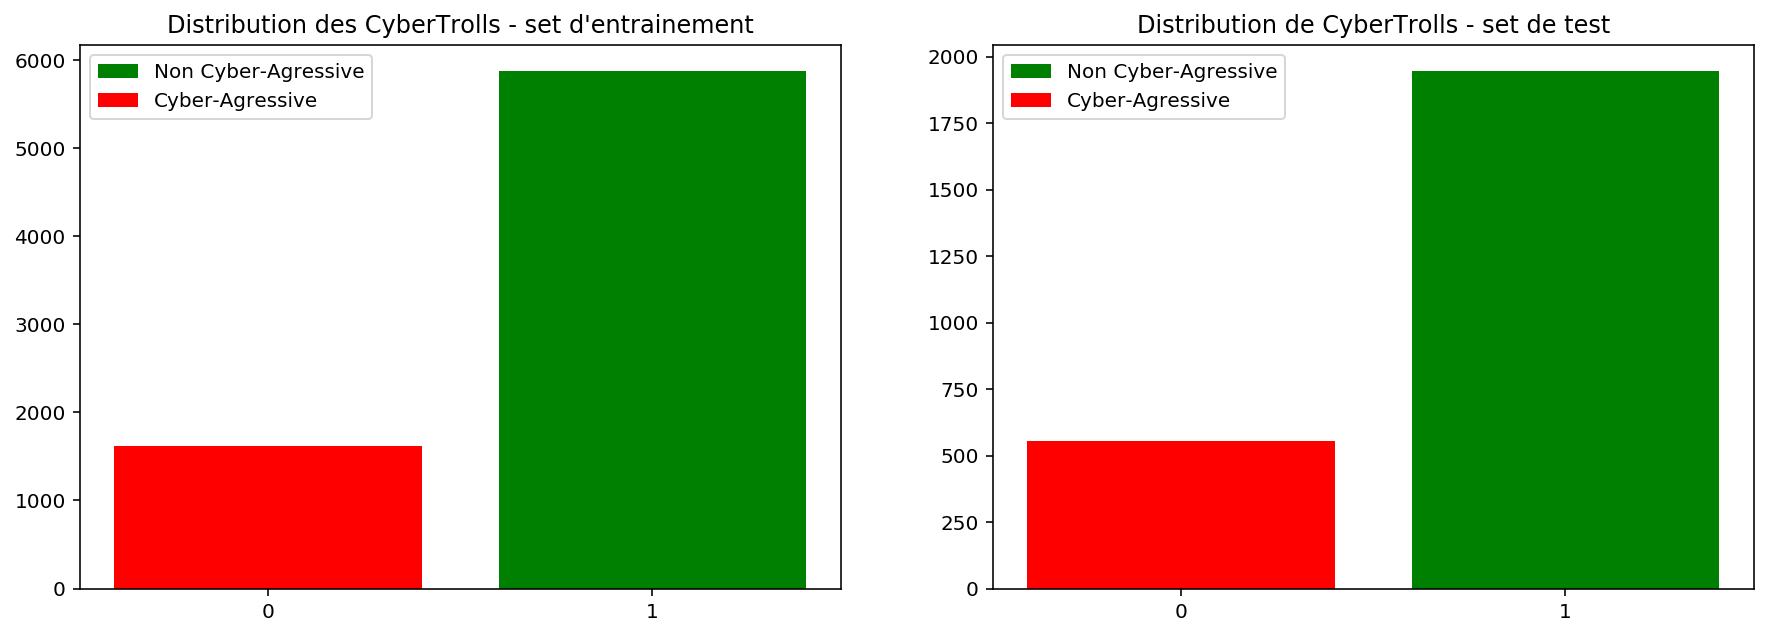

In [9]:
# Etiquettes des sets d'entrainements et de test
fig, axs = plt.subplots(1, 2, figsize=(15,5))

train_count = Counter(y_train)
axs[0].set_title('Distribution des CyberTrolls - set d\'entrainement')
axs[0].bar(list(train_count.keys())[0], list(train_count.values())[0], align='center', color='g', label='Non Cyber-Agressive')
axs[0].bar(list(train_count.keys())[1], list(train_count.values())[1], align='center', color='r', label='Cyber-Agressive')
axs[0].set_xticks(list(set(y_train)))
axs[0].legend()

test_count = Counter(y_test)
axs[1].set_title('Distribution de CyberTrolls - set de test')
axs[1].bar(list(test_count.keys())[0], list(test_count.values())[0], align='center', color='g', label='Non Cyber-Agressive')
axs[1].bar(list(test_count.keys())[1], list(test_count.values())[1], align='center', color='r', label='Cyber-Agressive')
axs[1].set_xticks(list(set(y_test)))
axs[1].legend()

plt.show()

In [10]:
from BaseModel import SVM

# svc params
params = {'C': np.logspace(-5, 5, 5)}
data = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
clf = SVM(description='dev')
clf.train(data=data, **params)
clf.display_results(data)

     Train Accuracy: 0.98
      Test Accuracy: 0.86
[[ 237  317]
 [  40 1906]]


## Sauvegarde du model et du vectorizer

In [11]:
utils.persist_model(clf, 'test_v.0')
utils.persist_model(clf, 'test_v.0')

Model Saved.
Model Saved.


In [12]:
data['X_train'].shape

(7499, 8962)